### Extract image features

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Functions

In [8]:
import sys
sys.path.append('../')

from functions.fun_features import load_images_from_folder, process_book_cover

In [9]:
images = load_images_from_folder('/interm_outputs/book_covers/')

img = images[0]

In [17]:
type(images)

list

In [10]:
img[0]

'1840243503.jpg'

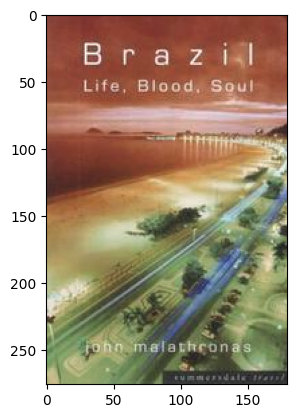

In [11]:
img[1].shape

## Plot the image
plt.imshow(img[1])


In [16]:
type(img[1])

numpy.ndarray

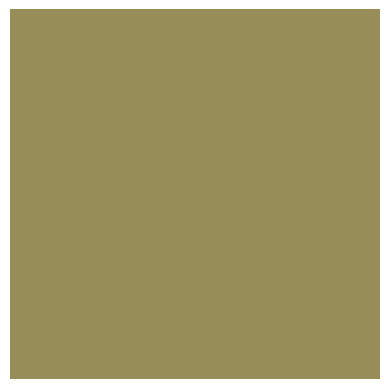

Dominant Color (HSV): [ 95.23687 105.66679 151.21672]
Inferred Mood: Mysterious with vibrant colors


'Mysterious with vibrant colors'

In [18]:
domin_color, mood = process_book_cover(img[1])
mood

In [19]:
type(domin_color)

numpy.ndarray